In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rashikrahmanpritom_groceries_dataset_for_market_basket_analysismba_path = kagglehub.dataset_download('rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba')

print('Data source import complete.')


Data source import complete.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df = pd.read_csv('/kaggle/input/groceries-dataset-for-market-basket-analysismba/Groceries data.csv')

In [ ]:
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [ ]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [ ]:
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_ary,columns=te.columns_)

In [ ]:
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
frequent_itemsets_apriori=apriori(df_encoded,min_support=0.01,use_colnames=True)
print("Frequent Itemsets using Apriori:")
print(frequent_itemsets_apriori)

Frequent Itemsets using Apriori:
       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (whole milk, whipped/sour cream, yogurt, soda)
3012  0.010518  (rolls/buns, other vegetables, yogurt, whole m...
3013  0.013597  (rolls/buns, other vegetables, yogurt, whole m...
3014  0.010005  (rolls/buns, other vegetables, yogurt, whole m...
3015  0.013597  (rolls/buns, other vegetables, yogurt, soda, w...

[3016 rows x 2 columns]


In [ ]:
num_itemsets = len(frequent_itemsets_apriori)

In [ ]:
rules_apriori = association_rules(frequent_itemsets_apriori,num_itemsets ,metric="lift", min_threshold=1.0)
print("Association Rules from Apriori:")
print(rules_apriori)

Association Rules from Apriori:
              antecedents                                        consequents  \
0              (UHT-milk)                                             (beef)   
1                  (beef)                                         (UHT-milk)   
2              (UHT-milk)                                     (bottled beer)   
3          (bottled beer)                                         (UHT-milk)   
4         (bottled water)                                         (UHT-milk)   
...                   ...                                                ...   
15255        (rolls/buns)       (whole milk, other vegetables, yogurt, soda)   
15256  (other vegetables)             (rolls/buns, whole milk, yogurt, soda)   
15257            (yogurt)   (rolls/buns, other vegetables, soda, whole milk)   
15258              (soda)  (rolls/buns, other vegetables, yogurt, whole m...   
15259        (whole milk)       (rolls/buns, other vegetables, yogurt, soda)   

       

In [ ]:
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print("Frequent Itemsets using FP-Growth:")
print(frequent_itemsets_fpgrowth)

Frequent Itemsets using FP-Growth:
       support                               itemsets
0     0.458184                           (whole milk)
1     0.313494                                 (soda)
2     0.282966                               (yogurt)
3     0.206003                              (sausage)
4     0.177527                               (pastry)
...        ...                                    ...
3011  0.013340        (whole milk, seasonal products)
3012  0.010262        (rolls/buns, seasonal products)
3013  0.010005  (other vegetables, seasonal products)
3014  0.010005                 (frozen dessert, soda)
3015  0.012057           (whole milk, frozen dessert)

[3016 rows x 2 columns]


In [ ]:
num_itemsets_fp=len(frequent_itemsets_fpgrowth)

In [ ]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth,num_itemsets_fp, metric="lift", min_threshold=1.0)
print("Association Rules from FP-Growth:")
print(rules_fpgrowth)

Association Rules from FP-Growth:
               antecedents         consequents  antecedent support  \
0             (whole milk)              (soda)            0.458184   
1                   (soda)        (whole milk)            0.313494   
2             (rolls/buns)              (soda)            0.349666   
3                   (soda)        (rolls/buns)            0.313494   
4       (other vegetables)              (soda)            0.376603   
...                    ...                 ...                 ...   
15255  (seasonal products)  (other vegetables)            0.025911   
15256     (frozen dessert)              (soda)            0.023089   
15257               (soda)    (frozen dessert)            0.313494   
15258         (whole milk)    (frozen dessert)            0.458184   
15259     (frozen dessert)        (whole milk)            0.023089   

       consequent support   support  confidence      lift  representativity  \
0                0.313494  0.151103    0.32978

In [ ]:
item_frequencies = df_encoded.sum().sort_values(ascending=False)
most_common_item = item_frequencies.index[0]
most_common_count = item_frequencies.iloc[0]

print(f"Most frequent item: {most_common_item} (appeared in {most_common_count} transactions)")


Most frequent item: whole milk (appeared in 1786 transactions)


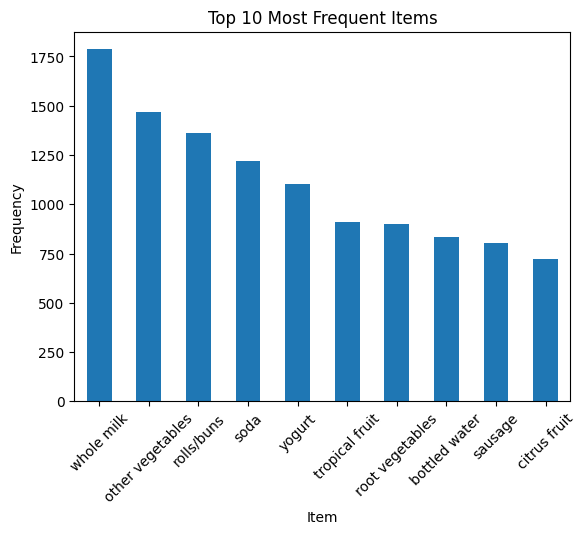

In [ ]:
import matplotlib.pyplot as plt

item_frequencies.head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Mã hóa giao dịch
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Áp dụng thuật toán FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Sắp xếp theo độ lift giảm dần và in top 10 luật kết hợp
rules_sorted = rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']].reset_index(drop=True)
print("Top 10 luật kết hợp mạnh nhất:")
print(rules_sorted.head(10))

Top 10 luật kết hợp mạnh nhất:
                                     antecedents                  consequents  \
0        (whole milk, sausage, other vegetables)         (rolls/buns, yogurt)   
1         (rolls/buns, other vegetables, yogurt)        (whole milk, sausage)   
2                                 (curd, yogurt)        (whole milk, sausage)   
3              (rolls/buns, sausage, whole milk)   (other vegetables, yogurt)   
4               (rolls/buns, yogurt, whole milk)  (sausage, other vegetables)   
5                             (whole milk, meat)              (domestic eggs)   
6        (rolls/buns, sausage, other vegetables)         (whole milk, yogurt)   
7                   (whipped/sour cream, yogurt)        (whole milk, sausage)   
8                           (sausage, pip fruit)   (other vegetables, yogurt)   
9  (whole milk, other vegetables, shopping bags)         (rolls/buns, yogurt)   

    support  confidence      lift  
0  0.013597    0.270408  2.428689  
1  0.

In [ ]:
# Mã hóa giao dịch
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Áp dụng thuật toán FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Chuyển cột antecedents và consequents từ dạng frozenset sang chuỗi dễ đọc
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Sắp xếp theo độ lift giảm dần và in top 10 luật kết hợp
rules_sorted = rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents', 'support', 'confidence', 'lift']].reset_index(drop=True)
print("Top 10 luật kết hợp mạnh nhất:")
print(rules_sorted.head(10))


Top 10 luật kết hợp mạnh nhất:
                                   antecedents                consequents  \
0        whole milk, sausage, other vegetables         rolls/buns, yogurt   
1         rolls/buns, other vegetables, yogurt        whole milk, sausage   
2                                 curd, yogurt        whole milk, sausage   
3              rolls/buns, sausage, whole milk   other vegetables, yogurt   
4               rolls/buns, yogurt, whole milk  sausage, other vegetables   
5                             whole milk, meat              domestic eggs   
6        rolls/buns, sausage, other vegetables         whole milk, yogurt   
7                   whipped/sour cream, yogurt        whole milk, sausage   
8                           sausage, pip fruit   other vegetables, yogurt   
9  whole milk, other vegetables, shopping bags         rolls/buns, yogurt   

    support  confidence      lift  
0  0.013597    0.270408  2.428689  
1  0.013597    0.259804  2.428575  
2  0.010005  